<a href="https://colab.research.google.com/github/Mrrobi/Binary-Classification-of-cancer-cell/blob/main/Breast%20Cancer%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# All Imports

In [ ]:
import io
import numpy as np
import pandas as pd
import pylab as pl
from scipy import interp
from sklearn import tree
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# DaTaSeT PaThS

In [ ]:
# #kazi
# cancer_data = pd.read_csv("/content/drive/My Drive/Capstone/Cancer cell detect dataset/Cancer cell/Cancer_cell_count.csv")
# normal_data = pd.read_csv("/content/drive/My Drive/Capstone/Cancer cell detect dataset/Normal cell/Normal_cell_count.csv")

In [ ]:
#robi
DX = pd.read_csv("/content/drive/My Drive/CapDataSet/GSE75688/GSE75688_GEO_processed_Breast_Cancer_raw_TPM_matrix.txt",delimiter="\t",header = None)
DY = pd.read_csv("/content/drive/My Drive/CapDataSet/GSE75688/GSE75688_final_sample_information.txt",delimiter="\t")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253

# CoMmOnCoDes FoR AlL

In [ ]:
X =DX.T
print(X.shape)
X['out'] = 2
X = X.drop(X.index[0:3])
X = np.asarray(X)
Y = np.asarray(DY)
print(X.shape)

Data = []
for i in range (0,528,1):

  if(Y[i][1]=='SC'):
    for j in range (0,563,1):
      if(Y[i][0] == X[j][0] and Y[i][2]=='Tumor'):
        X[j][-1] = 1
        Data.append(X[j])
      elif(Y[i][0] == X[j][0] and Y[i][2]=='nonTumor'):
        X[j][-1] = 0
        Data.append(X[j])
print(len(Data))
Data = np.array(Data)
# print(Data)
df = pd.DataFrame(data=Data)
print(type(df))
print(df)

(566, 57916)
(563, 57917)
515
<class 'pandas.core.frame.DataFrame'>
       0       1     2       3      4      ... 57912    57913    57914 57915 57916
0    BC01_02       0     0   50.73   3.28  ...     0  18414.3   537.11     0     1
1    BC01_03       0     0  120.46   0.81  ...     0  19603.4   653.27     0     1
2    BC01_04       0     0    6.97  92.23  ...     0  28523.9   916.42     0     1
3    BC01_05       0     0  180.85   6.44  ...     0  31210.6   961.37     0     1
4    BC01_06       0     0   32.09  59.78  ...     0  48684.5  2052.48     0     1
..       ...     ...   ...     ...    ...  ...   ...      ...      ...   ...   ...
510  BC06_43   94.55     0    6.26      0  ...     0   173183  5936.75     0     0
511  BC06_58       0     0       0      0  ...     0   413876    20986     0     0
512  BC06_60       0     0  349.99    1.1  ...     0  43575.6  1672.58     0     1
513  BC06_61       0     0  113.86      0  ...     0   355811  15899.6     0     0
514  BC06_74  134.3

In [ ]:
x = np.asarray(df.iloc[:, 1: -1])
y1 = np.asarray(df.iloc[ :, -1])
# feature_name = list(result.columns.values[:-1])

for i in range(0,515,1):
  for j in range(0,57915,1):
    x[i][j] = float(x[i][j])


# print(x)
# print(x.shape)
# print(y)
# print(y.shape)

In [ ]:
print(type(y1))
y2 = y1.tolist()
print(type(y2))
y3 = np.array(y2)

<class 'numpy.ndarray'>
<class 'list'>


In [ ]:
type(y3)

numpy.ndarray

In [ ]:
import keras
from sklearn.utils.multiclass import type_of_target
print(type_of_target(y3))

binary


In [ ]:
seed = 40
np.random.seed(seed)

kf = StratifiedKFold(n_splits=5, random_state=seed, shuffle=True)

# Support Vector Machine



for c = 0.7:
Test:
ACCURACY:91.2621
RECALL: 96.5327
Precision: 90.0692
Balanced: 89.683


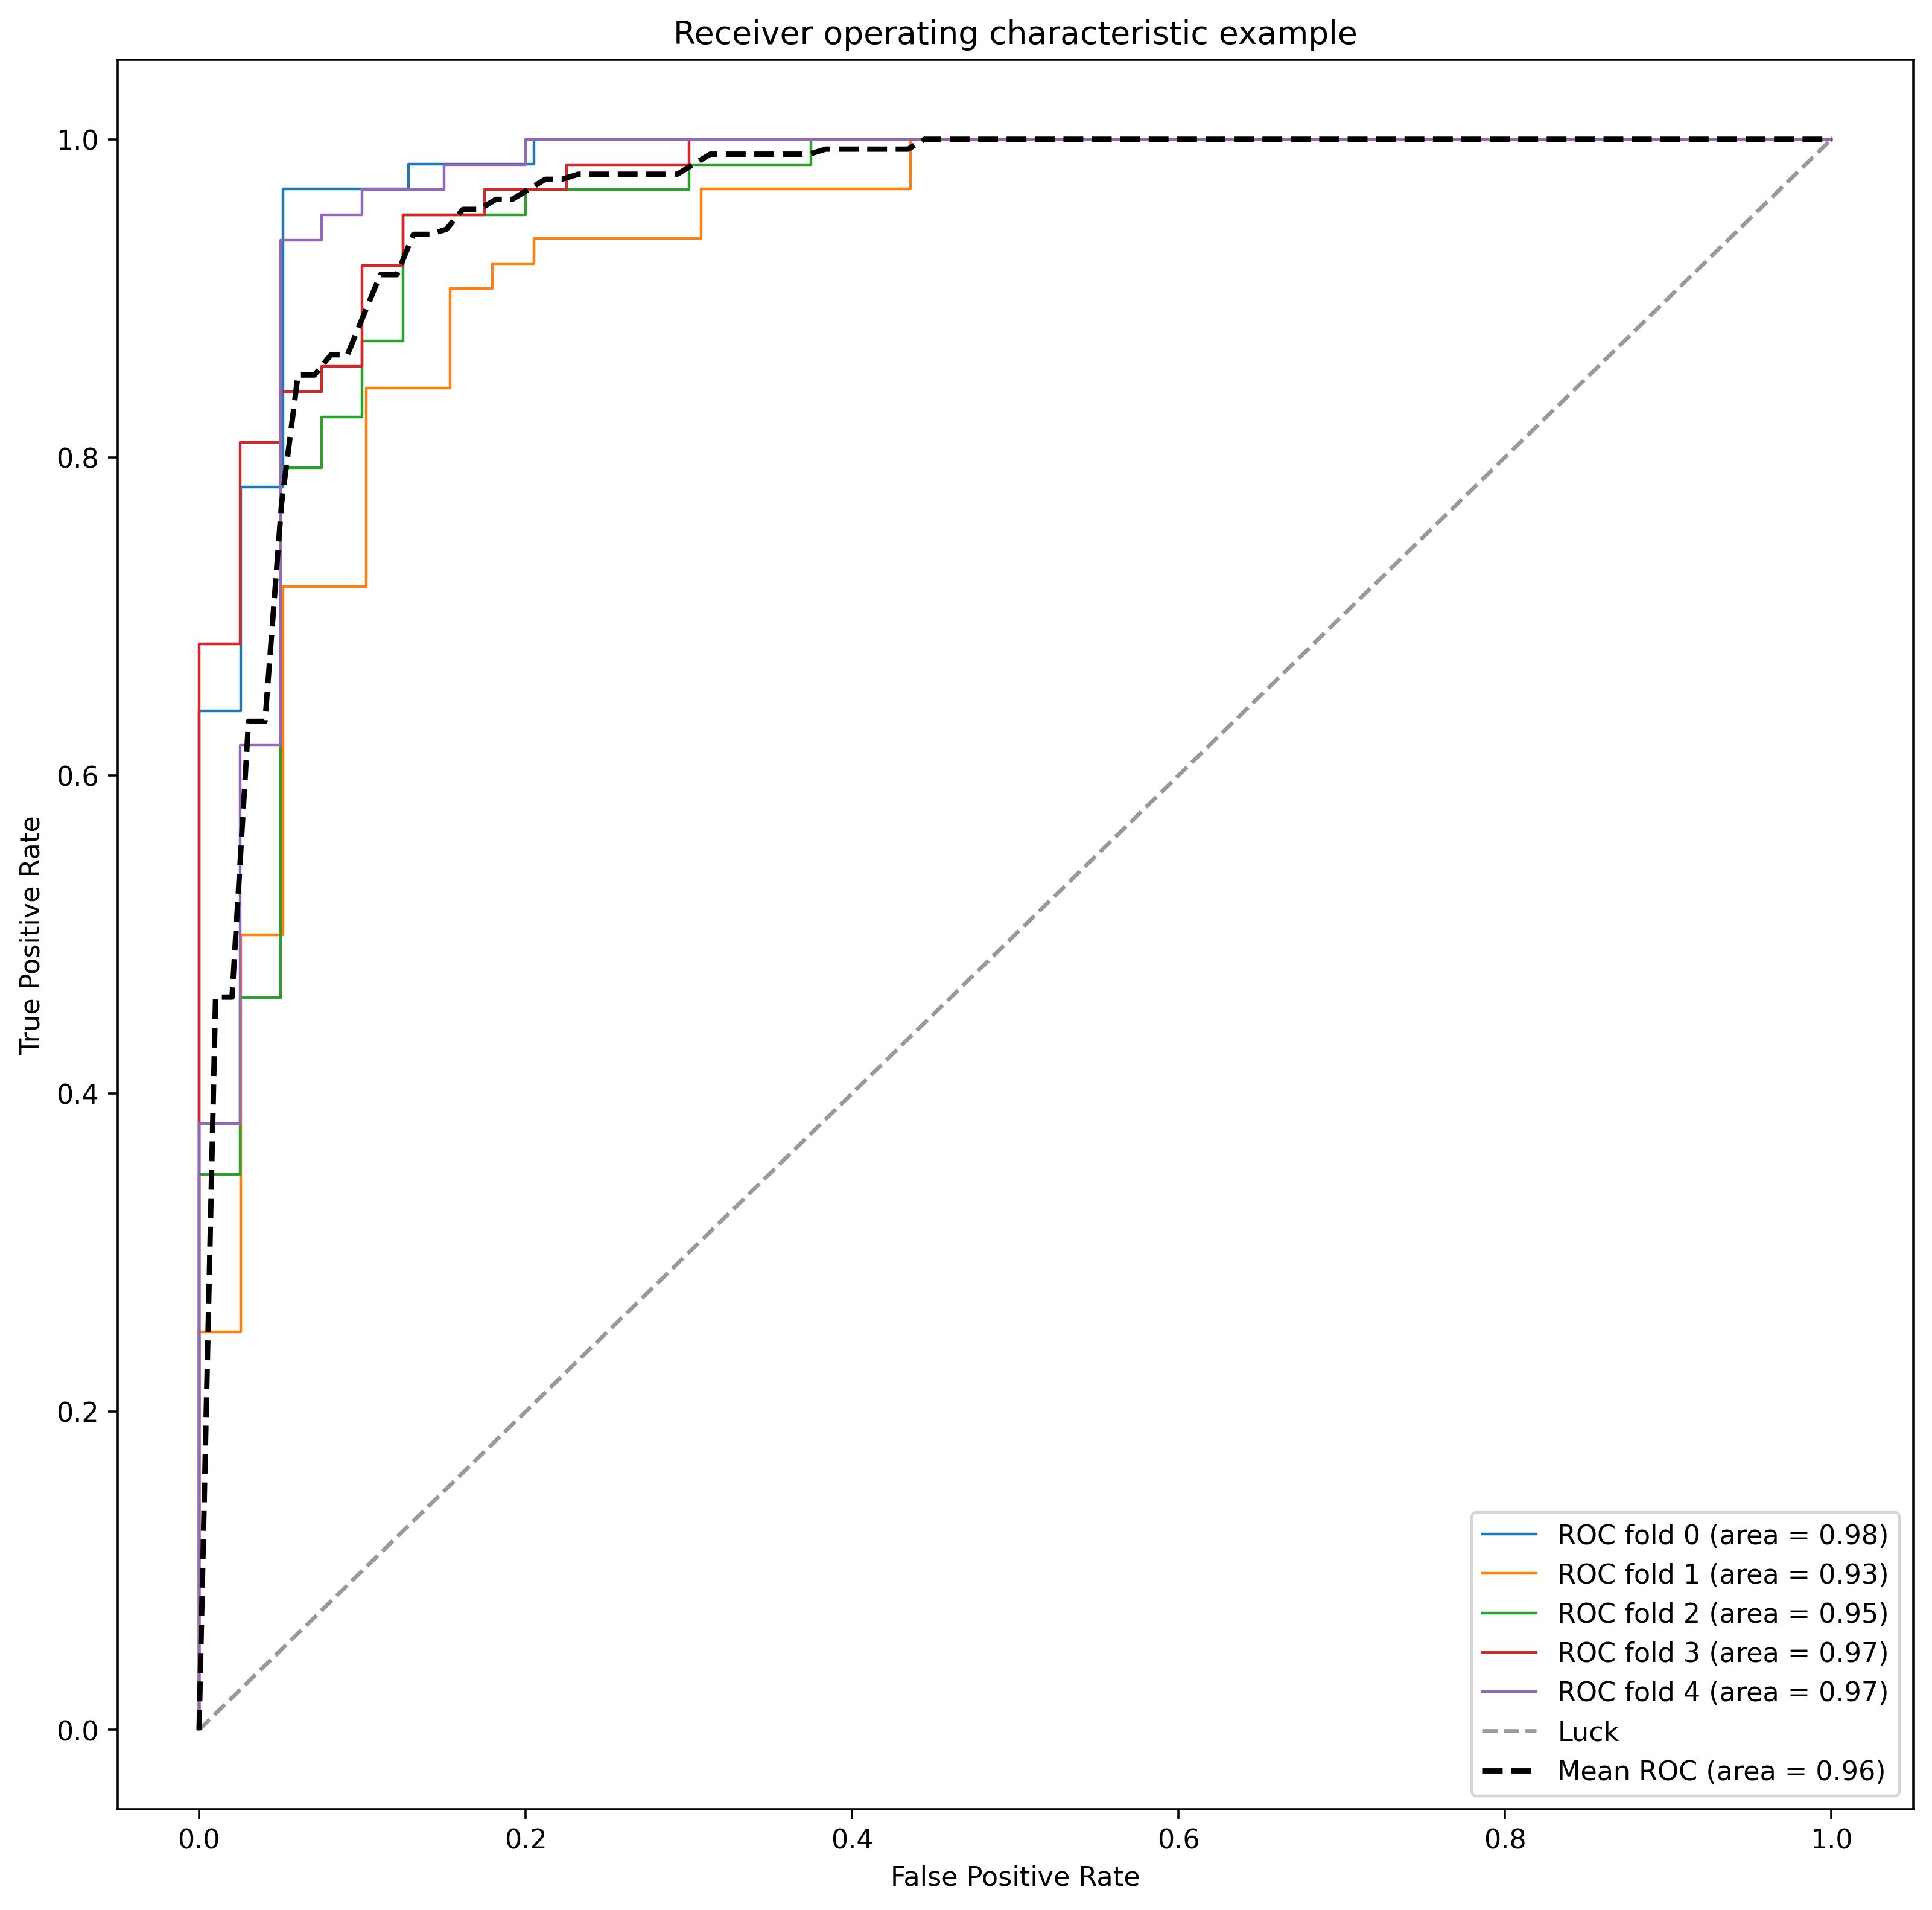

In [ ]:
c = 0.7
test_avg = 0
print(f'for c = {c}:')

clf = SVC(C=c,  random_state = seed, probability=True)
# acc_train = []
# recall_train = []
# pre_train = []
# balance_train = []

acc_test = []
recall_test = []
auROC_test = []
pre_test = []
balance_test = []
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []
i = 0
figure(figsize=(12, 12), dpi=320, facecolor='w', edgecolor='k')
for train_index, test_index in kf.split(x,y):

  x_train, x_test = x[train_index], x[test_index]
  y_train, y_test = y3[train_index], y3[test_index]
  
  probas_ = clf.fit(x_train, y_train).predict_proba(x_test)
  fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
  mean_tpr += np.interp(mean_fpr, fpr, tpr)
  mean_tpr[0] = 0.0
  roc_auc = auc(fpr, tpr)
  pl.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
  i = i + 1

  y_test_pred = clf.predict(x_test)

  acc_test.append(accuracy_score(y_test, y_test_pred))
  recall_test.append(recall_score(y_test, y_test_pred))
  pre_test.append(precision_score(y_test, y_test_pred))
  balance_test.append(balanced_accuracy_score(y_test, y_test_pred))

  # y_train_pred = clf.predict(x_train)

  # acc_train.append(accuracy_score(y_train, y_train_pred))
  # recall_train.append(recall_score(y_train, y_train_pred))
  # pre_train.append(precision_score(y_train, y_train_pred))
  # balance_train.append(balanced_accuracy_score(y_train, y_train_pred))



# print("train:")
# print("ACCURACY:{0:3.6}".format(np.mean(acc_train)*100))
# print("RECALL: {0:3.6}".format(np.mean(recall_train)*100))
# print("Precision: {0:3.6}".format(np.mean(pre_train)*100))
# print("Balanced: {0:3.6}".format(np.mean(balance_train)*100))

print("Test:")
print("ACCURACY:{0:3.6}".format(np.mean(acc_test)*100))
print("RECALL: {0:3.6}".format(np.mean(recall_test)*100))
print("Precision: {0:3.6}".format(np.mean(pre_test)*100))
print("Balanced: {0:3.6}".format(np.mean(balance_test)*100))

pl.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
#figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
mean_tpr /= 5
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
pl.plot(mean_fpr, mean_tpr, 'k--',
        label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

pl.xlim([-0.05, 1.05])
pl.ylim([-0.05, 1.05])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic example')
pl.legend(loc="lower right")
pl.show()


# Decision Tree 

Test:
ACCURACY:90.6796
RECALL: 93.378
Precision: 91.7313
Balanced: 89.8557


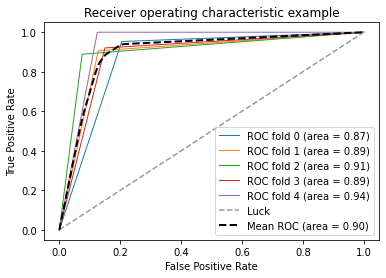

In [ ]:
#Decision Tree

clf = DecisionTreeClassifier()
# acc_train = []
# recall_train = []
# pre_train = []
# balance_train = []

acc_test = []
recall_test = []
auROC_test = []
pre_test = []
balance_test = []
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []
i = 0
for train_index, test_index in kf.split(x,y3):

  x_train, x_test = x[train_index], x[test_index]
  y_train, y_test = y3[train_index], y3[test_index]
  
  probas_ = clf.fit(x_train, y_train).predict_proba(x_test)
  fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
  mean_tpr += np.interp(mean_fpr, fpr, tpr)
  mean_tpr[0] = 0.0
  roc_auc = auc(fpr, tpr)
  pl.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
  i = i + 1

  y_test_pred = clf.predict(x_test)

  acc_test.append(accuracy_score(y_test, y_test_pred))
  recall_test.append(recall_score(y_test, y_test_pred))
  pre_test.append(precision_score(y_test, y_test_pred))
  balance_test.append(balanced_accuracy_score(y_test, y_test_pred))

  # y_train_pred = clf.predict(x_train)

  # acc_train.append(accuracy_score(y_train, y_train_pred))
  # recall_train.append(recall_score(y_train, y_train_pred))
  # pre_train.append(precision_score(y_train, y_train_pred))
  # balance_train.append(balanced_accuracy_score(y_train, y_train_pred))



# print("train:")
# print("ACCURACY:{0:3.6}".format(np.mean(acc_train)*100))
# print("RECALL: {0:3.6}".format(np.mean(recall_train)*100))
# print("Precision: {0:3.6}".format(np.mean(pre_train)*100))
# print("Balanced: {0:3.6}".format(np.mean(balance_train)*100))

print("Test:")
print("ACCURACY:{0:3.6}".format(np.mean(acc_test)*100))
print("RECALL: {0:3.6}".format(np.mean(recall_test)*100))
print("Precision: {0:3.6}".format(np.mean(pre_test)*100))
print("Balanced: {0:3.6}".format(np.mean(balance_test)*100))

pl.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
#figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
mean_tpr /= 5
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
pl.plot(mean_fpr, mean_tpr, 'k--',
        label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

pl.xlim([-0.05, 1.05])
pl.ylim([-0.05, 1.05])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic example')
pl.legend(loc="lower right")
pl.show()

# Random Forest

Test:
ACCURACY:95.9223
RECALL: 99.37
Precision: 94.3435
Balanced: 94.8901


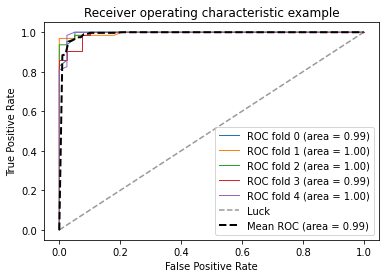

In [ ]:
#Random Forest

clf = RandomForestClassifier()
# acc_train = []
# recall_train = []
# pre_train = []
# balance_train = []

acc_test = []
recall_test = []
auROC_test = []
pre_test = []
balance_test = []
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []
i = 0
for train_index, test_index in kf.split(x,y):

  x_train, x_test = x[train_index], x[test_index]
  y_train, y_test = y3[train_index], y3[test_index]
  
  probas_ = clf.fit(x_train, y_train).predict_proba(x_test)
  fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
  mean_tpr += np.interp(mean_fpr, fpr, tpr)
  mean_tpr[0] = 0.0
  roc_auc = auc(fpr, tpr)
  pl.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
  i = i + 1

  y_test_pred = clf.predict(x_test)

  acc_test.append(accuracy_score(y_test, y_test_pred))
  recall_test.append(recall_score(y_test, y_test_pred))
  pre_test.append(precision_score(y_test, y_test_pred))
  balance_test.append(balanced_accuracy_score(y_test, y_test_pred))

  # y_train_pred = clf.predict(x_train)

  # acc_train.append(accuracy_score(y_train, y_train_pred))
  # recall_train.append(recall_score(y_train, y_train_pred))
  # pre_train.append(precision_score(y_train, y_train_pred))
  # balance_train.append(balanced_accuracy_score(y_train, y_train_pred))



# print("train:")
# print("ACCURACY:{0:3.6}".format(np.mean(acc_train)*100))
# print("RECALL: {0:3.6}".format(np.mean(recall_train)*100))
# print("Precision: {0:3.6}".format(np.mean(pre_train)*100))
# print("Balanced: {0:3.6}".format(np.mean(balance_train)*100))

print("Test:")
print("ACCURACY:{0:3.6}".format(np.mean(acc_test)*100))
print("RECALL: {0:3.6}".format(np.mean(recall_test)*100))
print("Precision: {0:3.6}".format(np.mean(pre_test)*100))
print("Balanced: {0:3.6}".format(np.mean(balance_test)*100))

pl.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
#figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
mean_tpr /= 5
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
pl.plot(mean_fpr, mean_tpr, 'k--',
        label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

pl.xlim([-0.05, 1.05])
pl.ylim([-0.05, 1.05])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic example')
pl.legend(loc="lower right")
pl.show()

# Adaboost Classifier

Test:
ACCURACY:97.6699
RECALL: 98.7351
Precision: 97.5416
Balanced: 97.3547


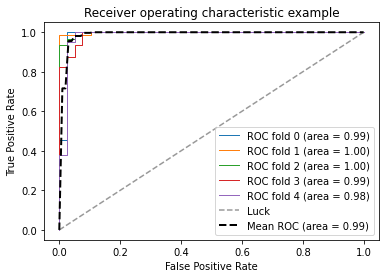

In [ ]:
#Adaboost 

clf = AdaBoostClassifier()
# acc_train = []
# recall_train = []
# pre_train = []
# balance_train = []

acc_test = []
recall_test = []
auROC_test = []
pre_test = []
balance_test = []
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []
i = 0
for train_index, test_index in kf.split(x,y):

  x_train, x_test = x[train_index], x[test_index]
  y_train, y_test = y3[train_index], y3[test_index]
  
  probas_ = clf.fit(x_train, y_train).predict_proba(x_test)
  fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
  mean_tpr += np.interp(mean_fpr, fpr, tpr)
  mean_tpr[0] = 0.0
  roc_auc = auc(fpr, tpr)
  pl.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
  i = i + 1

  y_test_pred = clf.predict(x_test)

  acc_test.append(accuracy_score(y_test, y_test_pred))
  recall_test.append(recall_score(y_test, y_test_pred))
  pre_test.append(precision_score(y_test, y_test_pred))
  balance_test.append(balanced_accuracy_score(y_test, y_test_pred))

  # y_train_pred = clf.predict(x_train)

  # acc_train.append(accuracy_score(y_train, y_train_pred))
  # recall_train.append(recall_score(y_train, y_train_pred))
  # pre_train.append(precision_score(y_train, y_train_pred))
  # balance_train.append(balanced_accuracy_score(y_train, y_train_pred))



# print("train:")
# print("ACCURACY:{0:3.6}".format(np.mean(acc_train)*100))
# print("RECALL: {0:3.6}".format(np.mean(recall_train)*100))
# print("Precision: {0:3.6}".format(np.mean(pre_train)*100))
# print("Balanced: {0:3.6}".format(np.mean(balance_train)*100))

print("Test:")
print("ACCURACY:{0:3.6}".format(np.mean(acc_test)*100))
print("RECALL: {0:3.6}".format(np.mean(recall_test)*100))
print("Precision: {0:3.6}".format(np.mean(pre_test)*100))
print("Balanced: {0:3.6}".format(np.mean(balance_test)*100))

pl.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
#figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
mean_tpr /= 5
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
pl.plot(mean_fpr, mean_tpr, 'k--',
        label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

pl.xlim([-0.05, 1.05])
pl.ylim([-0.05, 1.05])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic example')
pl.legend(loc="lower right")
pl.show()

# Gaussian Naive Bayes

Test:
ACCURACY:92.6214
RECALL: 97.4752
Precision: 91.2183
Balanced: 91.135


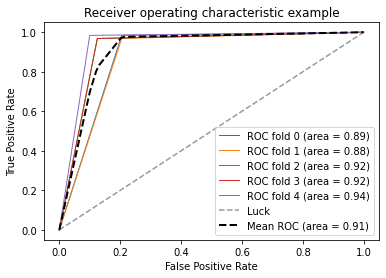

In [ ]:
#Gaussian Naive Bayes

clf = GaussianNB()
# acc_train = []
# recall_train = []
# pre_train = []
# balance_train = []

acc_test = []
recall_test = []
auROC_test = []
pre_test = []
balance_test = []
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []
i = 0
for train_index, test_index in kf.split(x,y):

  x_train, x_test = x[train_index], x[test_index]
  y_train, y_test = y3[train_index], y3[test_index]
  
  probas_ = clf.fit(x_train, y_train).predict_proba(x_test)
  fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
  mean_tpr += np.interp(mean_fpr, fpr, tpr)
  mean_tpr[0] = 0.0
  roc_auc = auc(fpr, tpr)
  pl.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
  i = i + 1

  y_test_pred = clf.predict(x_test)

  acc_test.append(accuracy_score(y_test, y_test_pred))
  recall_test.append(recall_score(y_test, y_test_pred))
  pre_test.append(precision_score(y_test, y_test_pred))
  balance_test.append(balanced_accuracy_score(y_test, y_test_pred))

  # y_train_pred = clf.predict(x_train)

  # acc_train.append(accuracy_score(y_train, y_train_pred))
  # recall_train.append(recall_score(y_train, y_train_pred))
  # pre_train.append(precision_score(y_train, y_train_pred))
  # balance_train.append(balanced_accuracy_score(y_train, y_train_pred))



# print("train:")
# print("ACCURACY:{0:3.6}".format(np.mean(acc_train)*100))
# print("RECALL: {0:3.6}".format(np.mean(recall_train)*100))
# print("Precision: {0:3.6}".format(np.mean(pre_train)*100))
# print("Balanced: {0:3.6}".format(np.mean(balance_train)*100))

print("Test:")
print("ACCURACY:{0:3.6}".format(np.mean(acc_test)*100))
print("RECALL: {0:3.6}".format(np.mean(recall_test)*100))
print("Precision: {0:3.6}".format(np.mean(pre_test)*100))
print("Balanced: {0:3.6}".format(np.mean(balance_test)*100))

pl.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
#figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
mean_tpr /= 5
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
pl.plot(mean_fpr, mean_tpr, 'k--',
        label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

pl.xlim([-0.05, 1.05])
pl.ylim([-0.05, 1.05])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic example')
pl.legend(loc="lower right")
pl.show()